### **Aim: Classification of Text written in images of banners, posters using Deep Learning techniques**## 




**Classification** is a computing task based on Supervised Machine Learning. It puts entities into categories based on past learning of different features about them. Neural Networks act as very good classifiers in the area of Deep Learning.

Image Classification is a very popular application of Machine Learning. Convolutional Neural Networks(CNN) is mostly suitable for image classification. Text Classification is another application area of image classification which has been in the light and has huge potential. Text has great amount of variability owing to different scripts. It is a very novel idea and demands immense research. Over the years, with the advancements in Deep Learning and Computer vision, the focus in dealing with images  has shifted from statistical based approach to a more advanced one.


1.	Data Collection: 
It is a very essential  step in the project as models available in the field of Deep learning are mostly for classifying objects and high level things. To classify text, we have to train the model in a suitable dataset, sufficient enough to make it learn the intricacies of different scripts  and achieve good accuracy in classification. There can be different collection methods for data- Web scrapping, Open source dataset and dataset creation


2.	Model selection: 
A proper model selection for classification is important. Convolutional Neural Networks (CNN) really fit well with images. So, its quite apt to use various versions of CNNs and tweak them for better results. 

3.	Pre- processing: 
Data is available in many forms. It has to be cleaned and processed to suite our needs. 

4.	Classification and visualisation: 
After doing all the desirables, classification and optimisation is performed. To get a better insight into the results, we visualise the data using various available tools and libraries like Matplotlib etc 
In addition to above, there can be intermediate steps for feature extraction or any further processing of data.





If we have a model which is trained on a huge dataset, so that it becomes efficient enough to learn on any new data, it will make things eaier for us.


**Transfer learning (TL)** is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. From the practical standpoint, reusing or transferring information from previously learned tasks for the learning of new tasks has the potential to significantly improve the sample efficiency of a reinforcement learning agent.

![](https://drive.google.com/uc?export=view&id=1K1Q8Nr7XLTbBCeogy4N6ph46N_WcFNoh)




**VGG16** is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. 

*One caveat of using VGG is that it is a slow network and consumes a lot of RAM. Due to its depth and number of fully-connected nodes, VGG16 is over 533MB*

![](https://drive.google.com/uc?export=view&id=1JG0YYR8y1_0wYaNts7jP_M1do8DPG-Ec)
Fig. Architecture of a VGG16 model






**ImageNet** is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories. The images were collected from the web and labeled by human labelers using Amazon’s Mechanical Turk crowd-sourcing tool. Starting in 2010, as part of the Pascal Visual Object Challenge, an annual competition called the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) has been held. ILSVRC uses a subset of ImageNet with roughly 1000 images in each of 1000 categories. In all, there are roughly 1.2 million training images, 50,000 validation images, and 150,000 testing images.





The VGG16 network when trained on the Imagenet dataset gets very efficient and that is the reason behind it achieving good accuracy. 

Now, when such a network is trained on any custom data, it can catch and learn the intricacies of the data very well.









**Dataset**

![](https://drive.google.com/uc?export=view&id=1oV8Uc74RwRSMSggLSK4m_phzoXqQQ17K)

The dataset consists of cropped text images






**Prerequisites**
1. Proficiency with Python scripting
2. A basic understanding of Neural Networks, specifically the Convolutional Neural Network (CNN)
3. Familiarity with the basic Python libraries - Numpy, Sklearn, Keras

Step by step implementation 

1. Mount Google  Drive with Google Collaboratory

This will basically bind Google Drive and Google Colaboratory



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

Migrating to the working directory

In [ ]:
%cd gdrive/My\ Drive/SKO-Project_TextClassification

In [ ]:
# !pip freeze > requirments.txt

This will install all libraries in compatible versions

In [ ]:
!pip install -r requirments.txt

The vgg16.py script defines the VGG16 network that will be used to build the model. It is present in the working directory.

In [ ]:
!python vgg16.py

2. Importing the libraries

**os ** - for operating sytem related tasks, mainly to access data into variables


**Keras ** - to build the model



**sklearn** - for data computaions and visualisation



**Matplotib** - To visualise the parameter curves

In [ ]:
import numpy as np
import os
import time
from vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import PIL

3. Loading the Data

Our Data is located in the dataset called 'data'. Initially lets run our model only on 2 text data- Tamil and Hindi which are present in the directory 'newdata' in the same order. 

Here, the training data is read to the variable data_dir_list

In [ ]:

import os
PATH = os.getcwd()
# Define data path
data_path='data/newdata'
data_dir_list = os.listdir(data_path)

4. Pre-processing the images

In [ ]:
img_data_list=[]
viz=[]

for dataset in data_dir_list:
  img_list=os.listdir(data_path+'/'+ dataset)
  print ('Loaded the images of text dataset-'+'{}\n'.format(dataset))
for img in img_list:
 img_path = data_path + '/'+ dataset + '/'+ img
 img = image.load_img(img_path, target_size=(224, 224))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)
 x = preprocess_input(x)

 print('Input text image shape:', x.shape)
 img_data_list.append(x)

5. Converting the images to the desired dimensional from-
**(No. of samples, Image size, Image size, No. of channels)**

In [ ]:

img_data = np.array(img_data_list)

print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(642, 1, 224, 224, 3)
(1, 642, 224, 224, 3)
(642, 224, 224, 3)


**Data Visualisation**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

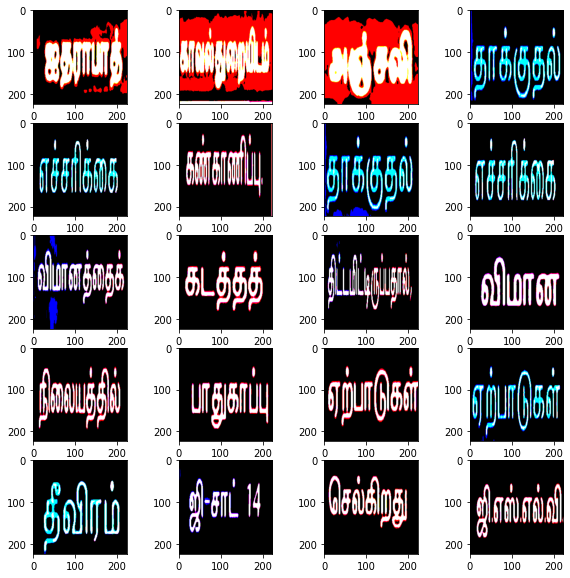

In [ ]:
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_data[i])
plt.show()

6. A pause to verify the number of samples we are dealing with 

In [ ]:
print(img_data.shape[0])

642


7. Defining the classes and labels using one - hot encoding.
It is a vector representation of the samples in terms of 0s and 1s, where a particular sample will have a 1 in its vector representaion only at the corresponding position of the class to which it belongs. The vector length will depend on the no. of classes. So, in this case the samples  will be represented as 01 or 10 depending on whether they belong to Tamil or Hindi. 

In this project, we will be dealing with classification of 2 scripts- Tamil and Hindi. For instance,

![](https://drive.google.com/uc?export=view&id=1xAeNZ89knWCSSe7T2JJrcxSItWA7y7BQ)

Here, the 1st and the 4th sample belongs to the Hindi script while the 2nd and 4th samples belong to the Tamil script 




In [ ]:

num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:641]=0
labels[642:1295]=1
# labels[1306:1958]=2
# labels[1959:2598]=3
# labels[1959:2598]=4
# labels[3205:3858]=5
# labels[3859:4510]=6
# labels[4511:5192]=7
# labels[5193:5812]=8
# labels[5813:6412]=9



names = ['tamil', 'hindi']

#convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)



In [ ]:
print((Y)[0][1])

0.0


In [ ]:
if(Y[1])

8. Splitting the dataset into Train and Test data for 

'X_train' and 'y_train' are the Training Data and Label

'X_test', 'y_test' are the Testing Data and Label

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=2, shuffle=False)

9. Building our custom VGG model with our data and imagenet weights


The VGG16 model by default has 1000 classes and correspondingly 1000 nodes. We have to modify the outer layer to have as many classes as the nodes, which in our case is 2.

In the following snippet, we are building our custom VGG model with our own custom data i.e. image_input and the 'imagenet' weights
We are adding a layer called 'last layer' after fc2 which is the fully- connected layer2, and we define that layer to have as many nodes as the number of classes

We can use a VGG16 model either as a classifier or as a feature extractor. In this case, it is being used as a classifier. Also, depending on the size of data, we can either retrain the whole network (preferable in case of smaller datasets) or only some part of the network (preferrable for medium to big datasets). The logic behind this is that the earlier layers of a network conntain low level feaures and as we go towards the classifer, the features found are high- level features. Also, retraining the whole network may be inefficent given that it takes a lot time.

In [ ]:
# Custom_vgg_model
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, weights='imagenet')                     #Defining the model to have tensors of shape same as input
model.summary()                                                                 #To view the model structure
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)       #Add a dense layer called 'out' having as many nodes as the no. of classes
custom_vgg_model = Model(image_input, out)                                      #Building the custom VGG model using the Keras model function API
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:                                      #Selecting all layers except the last layer
	layer.trainable = False                                                       #Freezing all layers except the last layer

custom_vgg_model.layers[3].trainable

#Compiling the model with optimiser 'rmsprop'
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


t=time.time()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

10. Visualising the Accuracy and Loss

In [ ]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(3)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
# #print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

So, this brings us to the end of this project. In this way, one can efficiently use Transfer Learning to classify images. One caveat with VGG16 is that it is very much RAM- heavy. So, it should be kept in mind that a proper balance is maintained between the size of your data and your model.


For any queries, you can reach out at- parvezr@skillup.tech
